# Project Python Foundations: FoodHub Data Analysis

**Marks: 40**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [43]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [44]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that. (0.5 mark)

In [45]:
# Write your code here
df.shape

(1898, 9)

#### The dataset has 1898 rows and 9 columns.  
#### We will use the 1898 entries to make inferences about how to improve the FoodHub customer experience.


### Question 2: Write the observations based on the below output from the info() method. (0.5 mark)

In [46]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### All columns have 1898 entries indicating that there are not any missing values in the dataset.  
#### change delivery time to datetime type? 
#### restaurant_name, cuisine_type, and day_of_the_week should be categorical variables

### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [47]:
# Coverting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations:


### **Question 4:** Write the code to find the summary statistics and write your observations based on that. (1 mark)

In [48]:
# Write your code here
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


#### The customer_id has a wide range and large standard deviation, indicating that there is a wide range between customer ids.
#### Order_id has a larger minimum, but smaller range and standard deviation than customer_id.  The order_ids are large values with a smaller difference between each value than customer_id. 
## break down into each restaurant category type - looking at subsets based on food prep time and rating, etc 

### **Question 5:** How many orders are not rated? (0.5 mark)

In [17]:
'''not_given = df['rating'] == 'Not given'
#len(not_given)
#PRINT IT OUT
# print not given 
# count trues 
count = 0 
#not_given = df[df['rating']=='Not given']
for i in not_given:
    if not_given == True: 
        count+=1
print(count)
'''

"not_given = df['rating'] == 'Not given'\n#len(not_given)\n#PRINT IT OUT\n# print not given \n# count trues \ncount = 0 \n#not_given = df[df['rating']=='Not given']\nfor i in not_given:\n    if not_given == True: \n        count+=1\nprint(count)\n"

In [49]:
not_given = df['rating'].isin(['Not given'])
len(df[not_given])

736

In [68]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations:


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset. (5 marks)

/Users/sydneystolle/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='cost_of_the_order', ylabel='Density'>

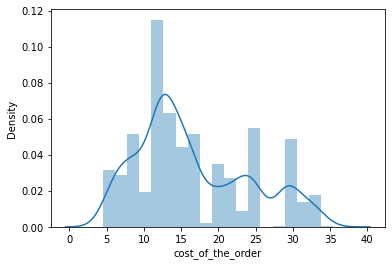

In [50]:
sns.distplot(df['cost_of_the_order'])

(array([736.,   0.,   0., 588.,   0.,   0., 188.,   0.,   0., 386.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

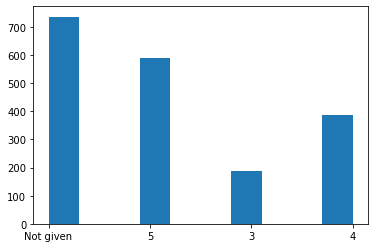

In [20]:
plt.hist(df['rating'])

(array([1351.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         547.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

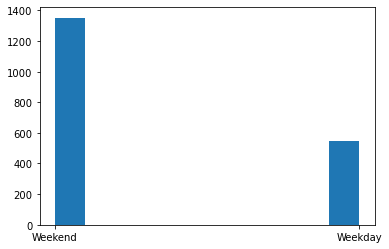

In [21]:
plt.hist(df['day_of_the_week'])

(array([177., 161., 178., 166.,  77., 282., 279., 296., 174., 108.]),
 array([15. , 16.8, 18.6, 20.4, 22.2, 24. , 25.8, 27.6, 29.4, 31.2, 33. ]),
 <BarContainer object of 10 artists>)

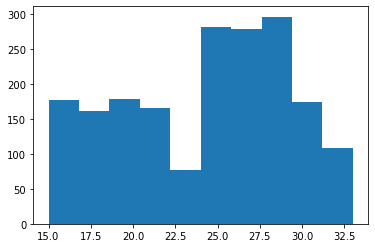

In [22]:
plt.hist(df['delivery_time'])

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders. (1 mark)

In [70]:
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Klong                          1
Kambi Ramen House              1
Il Bambino                     1
Hunan Manor                    1
Lamarca Pasta                  1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations:


### Question 8: Write the code to find the most popular cuisine on weekends. (1 mark)

In [52]:
# Write the code here

#df.groupby(['order_id'])

df['cuisine_type'].nunique()

14

In [53]:
my_tab = pd.crosstab(index=df["cuisine_type"],  # Make a crosstab
                     columns="count")                  # Name the count column
my_tab

col_0,count
cuisine_type,
American,584
Chinese,215
French,18
Indian,73
Italian,298
Japanese,470
Korean,13
Mediterranean,46
Mexican,77


#### Observations: Since there are only 14 cuisine types, the top 5 can easily be evaluated through a table.  The table provides visualization of the data, as well as the top 5 cuisine types which are American, Japanese, Italian, Chinese, and Mexican.  


### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?  (1 mark)

In [ ]:
# Write the code here
# no of orders/ total orders * 100 


#### Observations:


### Question 10: Write the code to find the mean delivery time based on this dataset. (1 mark)

In [54]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

In [55]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: In comparison to the 50th percentile, it seems as though the mean is sitting in a good position, less than the 50th percentile mark of the data. 


### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details. (1 mark)

In [28]:
df.loc[lambda df: df['cost_of_the_order'] == 35.41]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29


#### Observations:


### Bivariate Analysis

### Question 12: Perform bivariate analysis to explore relationships between the important variables in the dataset. (7 marks)


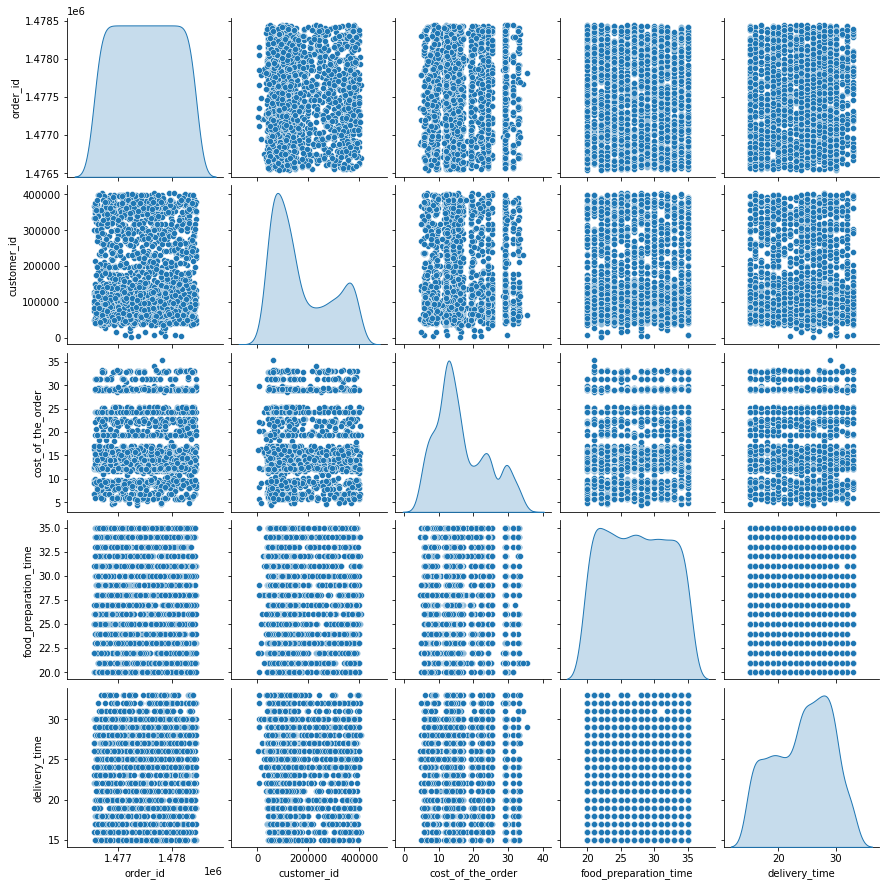

In [29]:
sns.pairplot(df, diag_kind='kde')

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer. (2 marks)

In [36]:
# Write the code here
# change object to integer 
# astype string --> integer 
# df['rating'].astype(str).astype(int)
# agg count 
# groupby with multiple conditions

#df.groupby(by=['rating']).mean() > 4

In [31]:
df.groupby('restaurant_name')['rating']

In [56]:
df_q13 = df.copy()

In [57]:
df_q13.drop(df.loc[df['rating']=='Not given'].index, inplace=True)

In [58]:
df_q13['rating'].astype(str).astype(int)

2       5
3       3
4       4
5       3
7       3
       ..
1889    3
1890    5
1893    5
1894    5
1896    5
Name: rating, Length: 1162, dtype: int64

In [59]:
df_q13

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30
...,...,...,...,...,...,...,...,...,...
1889,1478190,94152,RedFarm Broadway,Chinese,8.68,Weekday,3,33,30
1890,1477316,164776,TAO,Japanese,15.67,Weekend,5,20,22
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19


In [60]:
df_q13['rating'].groupby(df_q13['restaurant_name'])

In [65]:
#df2 = pd.df_q13({"X": ["restaurant_name"], "Y": ["rating"]})
#df2.groupby(["X"]).sum()

In [67]:
#df2 = pd.df_q13({"X": df_q13["restaurant_name"], "Y": df_q13["rating"]})
#df2.groupby(["X"]).sum()

In [63]:
df_q13.groupby(['restaurant_name']).sum()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
restaurant_name,,,,,
'wichcraft,1478304,321492,8.10,28,28
12 Chairs,2955529,502104,45.35,55,58
5 Napkin Burger,2955842,526371,54.27,53,42
67 Burger,1478041,96456,29.05,20,28
Alidoro,0,0,0.00,0,0
...,...,...,...,...,...
Zero Otto Nove,1477801,268365,12.18,29,25
brgr,1477306,94691,5.72,24,26
da Umberto,1476867,91879,12.27,20,30


#### Observations:


### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset. (2 marks)

In [ ]:
# Write the code here
# make a new column with fee added 
# aggregate with the condition percentage gives fee to the cost


#### Observations:


### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time. (2 marks)

Note: The total delivery time is the summation of the food preparation time and delivery time. 

In [ ]:
# Write the code here

#### Observations:


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results. (2 marks)

In [ ]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis. (3 marks)

#### Key Insights: